<span style="font-family: 'Times New Roman'; font-size: 16px;">Your text goes here</span>

/var/folders/23/0nr_90qn60758bcbd4h2x5dc0000gn/T/ipykernel_18173/1927413417.py:43: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(num):


  0%|          | 0/1000 [00:00<?, ?it/s]

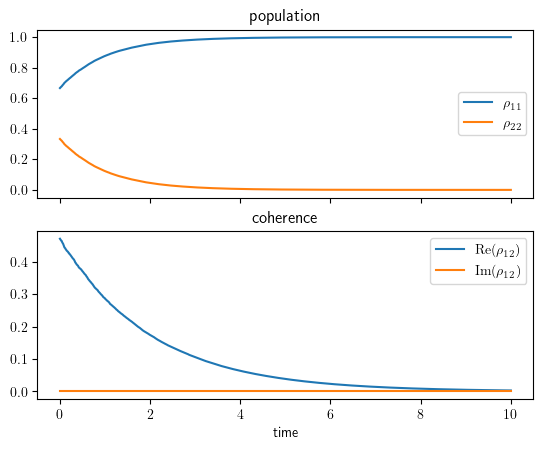

In [12]:
# Quantum jump in a 2-level system
# hbar is 1 in this project
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tnrange

# Quantum system setup 
gamma = 1.                                   # population decay rate
delta = 0.                                   # detuning
c = Qobj(np.array([[0,1],[0,0]]))            # jump operator with basis |g> , |e>
H0 = Qobj(np.array([[delta,0],[0,0]]))       # system Hamiltonian
H = H0 - 0.5j * gamma * c.conj().trans() * c # non-unitary effective Hamiltonian
t=10                                         # total evolving time 
dt=0.01                                      # length unit of time slices
Nt=int(t/dt)                                 # total amount of time slices
num=1000                                     # the total number of the system replica  
a_1, a_2 = np.sqrt(2/3), np.sqrt(1/3)        # the initial state coefficients

# calculate the probability
def prob(coefficient):
    return pow(coefficient.real,2)+pow(coefficient.imag,2)

def state_evol_time_line(coefficient_1=1,coefficient_2=0):
  # create an initial normalized state to track one state jumping with time
  psi=[Qobj(np.array([[coefficient_1],[coefficient_2]]))]
  n = 0
  while n <= t/dt:
      state_jump = c * psi[n]
      jump_rate = state_jump.norm() ** 2
      r = random.random()
      if jump_rate * dt > r:
          psi.append(state_jump / state_jump.norm())
      else:
          state_no_jump = psi[n] - 1j * H * psi[n] * dt
          psi.append(state_no_jump / state_no_jump.norm())
      n += 1
  return psi

# collecting the time evolution for each quantum jump
realization = []
for i in tnrange(num):
  realization.append(state_evol_time_line(a_1,a_2))

# projector
p1 = Qobj(np.array([[1,0]]))
p2 = Qobj(np.array([[0,1]]))

# activate text rendering by LaTex
plt.rcParams.update({"text.usetex": True})

# data points for population dynamics
time_points = np.linspace(0., t, Nt)
rho11_points = np.array([np.mean([prob(p1 * realization[i][j]) for i in range(num)]) for j in range(Nt)])
rho22_points = np.array([np.mean([prob(p2 * realization[i][j]) for i in range(num)]) for j in range(Nt)])

# data points for coherent dynamics
rho12_points_list = [np.mean([np.conj(p1 * realization[i][j]) * p2 * realization[i][j] for i in range(num)]) for j in range(Nt)]
Re_rho12_points = np.array([c.real for c in rho12_points_list])
Im_rho12_points = np.array([c.imag for c in rho12_points_list])

fig, axs = plt.subplots(2)
axs[0].plot(time_points,rho11_points)
axs[0].plot(time_points,rho22_points)
axs[0].legend([r"$\rho_{11}$",r"$\rho_{22}$"]) 
axs[0].set_title('population')
axs[1].plot(time_points,Re_rho12_points)
axs[1].plot(time_points,Im_rho12_points)
axs[1].legend([r"$\mathrm{Re}(\rho_{12})$",r"$\mathrm{Im}(\rho_{12})$"]) 
axs[1].set_title('coherence')

for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

/var/folders/23/0nr_90qn60758bcbd4h2x5dc0000gn/T/ipykernel_18173/2524728104.py:44: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(num):


  0%|          | 0/1000 [00:00<?, ?it/s]

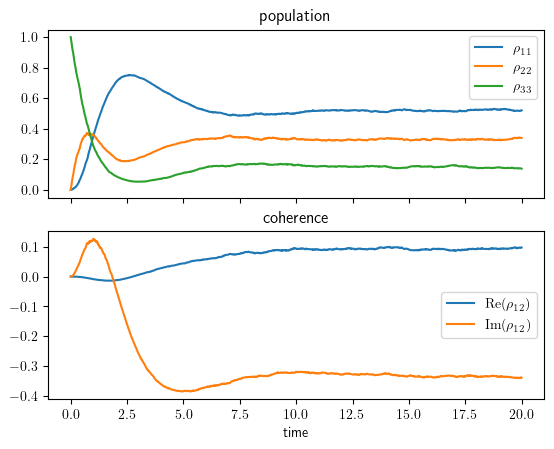

In [9]:
# Quantum jump in a cascade system
# hbar is 1 in this script
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import random # random generator
from tqdm import tnrange # progress indicator

# Quantum system setup 
gamma = 1.                                      # population decay rate
delta = 0.1                                     # detuning
Omega = 0.5                                     # Rabi frequency
c = Qobj(np.array([[0,1,0],[0,0,1],[0,0,0]]))   # jump operator with cascade system |3> -> |2> -> |1>
H0 = Qobj(np.array([[0,Omega,0],[Omega,-delta,Omega],[0,Omega,-2*delta]]))   # system Hamiltonian
H = H0 - 0.5j * gamma * c.conj().trans() * c     # non-unitary effective Hamiltonian
t=20                                             # total evolving time 
dt=0.01                                          # length unit of time slices
Nt=int(t/dt)                                     # total amount of time slices
num=1000                                         # the total number of the system replica  
a_1, a_2, a_3 = 0, 0, 1                          # the initial state coefficients

# calculate the probability
def prob(coefficient):
    return pow(coefficient.real,2)+pow(coefficient.imag,2)

def state_evol_time_line(coefficient_1=0,coefficient_2=0,coefficient_3=1):
  # create an initial normalized state to track one state jumping with time
  psi=[Qobj(np.array([[coefficient_1],[coefficient_2],[coefficient_3]]))]
  n = 0
  while n <= t/dt:
      state_jump = c * psi[n]
      jump_rate = state_jump.norm() ** 2
      r = random.random()
      if jump_rate * dt > r:
          psi.append(state_jump / state_jump.norm())
      else:
          state_no_jump = psi[n] - 1j * H * psi[n] * dt
          psi.append(state_no_jump / state_no_jump.norm())
      n += 1
  return psi

# collecting the time evolution for each quantum jump
realization = []
for i in tnrange(num):
  realization.append(state_evol_time_line(a_1,a_2,a_3))

# projector
p1 = Qobj(np.array([[1,0,0]]))
p2 = Qobj(np.array([[0,1,0]]))
p3 = Qobj(np.array([[0,0,1]]))

# activate text rendering by LaTex
plt.rcParams.update({"text.usetex": True})

# data points for population dynamics
time_points = np.linspace(0., t, Nt)
rho11_points = np.array([np.mean([prob(p1 * realization[i][j]) for i in range(num)]) for j in range(Nt)])
rho22_points = np.array([np.mean([prob(p2 * realization[i][j]) for i in range(num)]) for j in range(Nt)])
rho33_points = np.array([np.mean([prob(p3 * realization[i][j]) for i in range(num)]) for j in range(Nt)])

# data points for coherent dynamics
rho12_points_list = [np.mean([np.conj(p1 * realization[i][j]) * p2 * realization[i][j] for i in range(num)]) for j in range(Nt)]
Re_rho12_points = np.array([c.real for c in rho12_points_list])
Im_rho12_points = np.array([c.imag for c in rho12_points_list])

fig, axs = plt.subplots(2)
axs[0].plot(time_points,rho11_points)
axs[0].plot(time_points,rho22_points)
axs[0].plot(time_points,rho33_points)
axs[0].legend([r"$\rho_{11}$",r"$\rho_{22}$",r"$\rho_{33}$"]) 
axs[0].set_title('population')
axs[1].plot(time_points,Re_rho12_points)
axs[1].plot(time_points,Im_rho12_points)
axs[1].legend([r"$\mathrm{Re}(\rho_{12})$",r"$\mathrm{Im}(\rho_{12})$"]) 
axs[1].set_title('coherence')

for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()